![](http://sigdelta.com/assets/images/sages-sd-logo.png)

# Analiza danych i uczenie maszynowe w Python

Autor notebooka: Jakub Nowacki.

## Metody bez nadzoru

Uczenie maszynowe ma wiele algorytmów działających bez nadzoru, czyli bez sklasyfikowanych danych. Służą one do odkrywania różnych wzorców i prawidłowości w danych, lub zmniejszania liczby stopni swobody. 

## Klastrowanie

Jest wiele metod klastrowania i mają one różne właściwości, w zależności od problemu. Poniżej ogólna charakterystyka dostępnych algorytmów. 

![](http://scikit-learn.org/0.15/_images/plot_cluster_comparison_001.png)

Wygenerujmy najpierw dane do klastrowania.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 8)

np.random.seed(4711) 
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
A = pd.DataFrame({
    'x': a[:, 0],
    'y': a[:, 1],
    'label': 0,
})
B = pd.DataFrame({
    'x': b[:, 0],
    'y': b[:, 1],
    'label': 1,
})
X = pd.concat([A, B])

X.head()

,x,y,label
0,9.211884,-0.151886,0
1,8.889374,-0.339375,0
2,10.768401,2.952446,0
3,8.242133,1.290948,0
4,5.796701,-5.837767,0


In [2]:
X.describe()

,x,y,label
count,150.000000,150.000000,150.000000
mean,6.751880,6.683081,0.333333
std,4.877784,9.598625,0.472984
min,-3.125396,-5.837767,0.000000
25%,1.427304,-0.535173,0.000000
50%,8.708074,1.298940,0.000000
75%,10.460816,18.693646,1.000000
max,16.363330,24.084572,1.000000


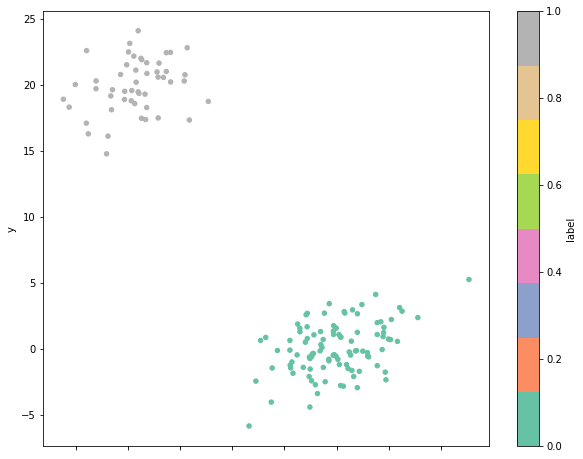

In [3]:
X.plot.scatter(x='x', y='y', c='label', cmap=plt.cm.Set2);

### K-means

Algorytm centroidów ([K-means](https://en.wikipedia.org/wiki/K-means_clustering)) jest jednym z prostszych algorytmów klastrowania, który opiera się na odległościach punktów od centrów klastrów.

![](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)

O ile zbieżność klastrów odbywa się automatycznie, to sam wybór ilości klastrów jest zdefiniowany przez użytkownika.

In [8]:
from sklearn.cluster import KMeans

features = ['x', 'y']

km = KMeans(n_clusters=5)
km.fit(X[features])

X['predict'] = km.predict(X[features])

X.head()

,x,y,label,predict
0,9.211884,-0.151886,0,3
1,8.889374,-0.339375,0,3
2,10.768401,2.952446,0,2
3,8.242133,1.290948,0,3
4,5.796701,-5.837767,0,0


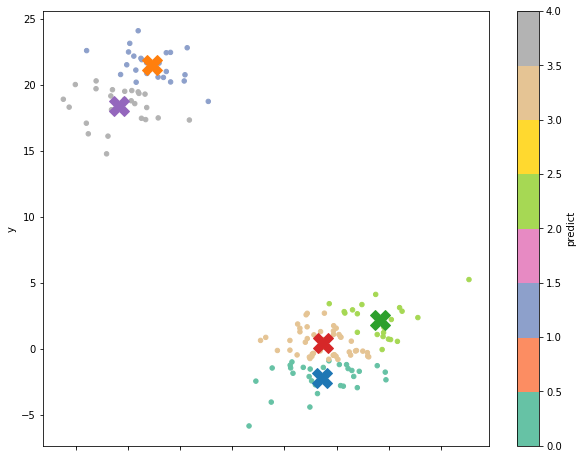

In [9]:
ax = X.plot.scatter(x='x', y='y', c='predict', cmap=plt.cm.Set2)

for i, (cx, cy) in enumerate(km.cluster_centers_):
    ax.plot(cx, cy, 'X', markersize=20)

#### Zadanie

1. Zmień ilość klastrów `n_clusters`; co się zmieniło?
1. Zmień algorytm na `MiniBatchKMeans`; co się zmieniło?
1. ★ Wygeneruj nowe dane, gdzie klastry są bliżej siebie; co się zmieniło?

### Klastrowanie hierarchiczne

Klastrowanie hierarchiczne ([Hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering)) jest metodą klastrowania, która buduję sieć połączeń pomiędzy najbliższymi siebie elementami na podstawie miary odległości. 

 Klastry | Budowa połączeń
- | - 
![alt](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Clusters.svg/250px-Clusters.svg.png) | ![alt](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Hierarchical_clustering_simple_diagram.svg/418px-Hierarchical_clustering_simple_diagram.svg.png)

Klastrowanie metodami hierarchicznymi (aglomeracylnymi) jest dostępne jako jedna z metod klastrowania w scikit-learn. Można ją użyć podobnie jak K-means.

In [10]:
from sklearn.cluster import AgglomerativeClustering

cls = AgglomerativeClustering(linkage='ward', n_clusters=2)

cls.fit(X[features])

X['predict'] = cls.labels_

X.head()

,x,y,label,predict
0,9.211884,-0.151886,0,0
1,8.889374,-0.339375,0,0
2,10.768401,2.952446,0,0
3,8.242133,1.290948,0,0
4,5.796701,-5.837767,0,0


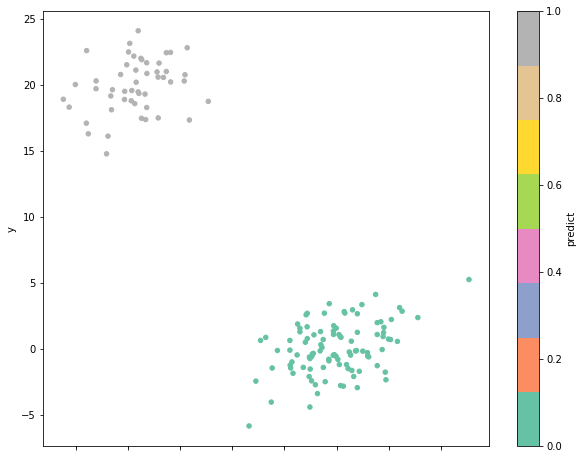

In [11]:
ax = X.plot.scatter(x='x', y='y', c='predict', cmap=plt.cm.Set2)

#### Zadanie

1. Zmień ilość klastrów `n_clusters`; co się zmieniło?
1. Zmień algorytm w parametrze `linkage`; zobacz [dokumentację](http://scikit-learn.org/0.15/modules/generated/sklearn.cluster.AgglomerativeClustering.html); co się zmieniło?
1. ★ Wygeneruj nowe dane, gdzie klastry są bliżej siebie; co się zmieniło?

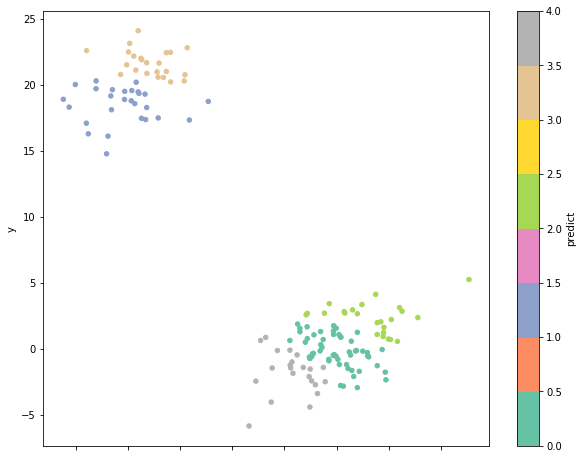

In [16]:
from sklearn.cluster import AgglomerativeClustering

cls = AgglomerativeClustering(linkage='ward', n_clusters=5)

cls.fit(X[features])

X['predict'] = cls.labels_

X.head()
ax = X.plot.scatter(x='x', y='y', c='predict', cmap=plt.cm.Set2)

Możemy wykorzystać cechy klastrowania hierarchicznego do budowy dendrogramu. Musimy najpierw zbudować macierz połączeń używając któregoś z algorytmów, w tym przypadku Warda. 

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X[features], 'ward')
Z[:3]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00]])

Po zbudowaniu macieży możemy ją narysować używając Matplotlib i SciPy.

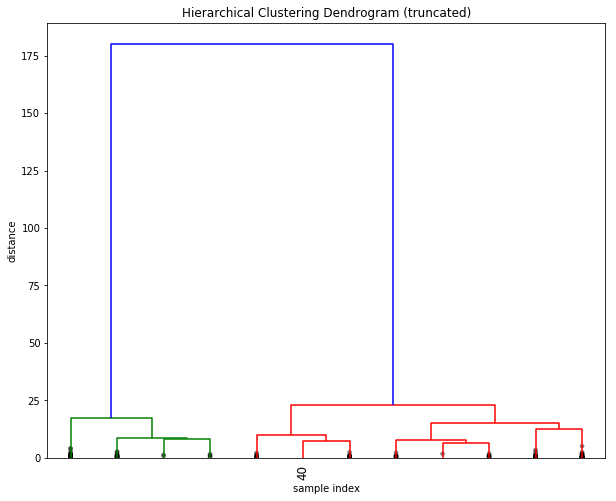

In [18]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=12, 
    show_leaf_counts=False, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True, 
)
plt.show()

#### Zadanie

1. Zmień ilość klastrów `n_clusters`; co się zmieniło?
1. Zmień algorytm w parametrze `linkage`; zobacz [dokumentację](http://scikit-learn.org/0.15/modules/generated/sklearn.cluster.AgglomerativeClustering.html); co się zmieniło?

## Principal Component Analysis

[Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) jest metodą zmniejszania stopnia swobody, czyli ilości zmiennych, w danym problemie. 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/720px-GaussianScatterPCA.svg.png)

Przekształcenie wykonuje swoisty obrót przestrzeni w taki sposób, aby kolejne wektory składowe były posortowane od największej wariancji do najmniejszej. Nowe wektory rozpinające przestrzeń są formą wektorów własnych macierzy kowariancji.

Dla ilustracji wykonujemy poniżej dekompozycję zbioru irysów używając PCA.

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
p = pca.fit_transform(X[['x', 'y']])
p[:10]

array([[ -7.23084517,  -0.6951744 ],
       [ -7.26261373,  -1.06686677],
       [ -5.08879835,   2.03818602],
       [ -5.51203662,  -0.9557205 ],
       [-10.91318556,  -6.21179381],
       [ -5.29274907,  -2.94484119],
       [ -7.03593023,  -1.82648545],
       [-10.86621083,  -2.95559245],
       [ -7.28666727,  -1.13836019],
       [ -5.1487411 ,   1.60310711]])

Najpierw narysujmy komponenty w oryginalnym układzie współrzędnych. 

In [22]:
pca_score = pca.explained_variance_ratio_
V = pca.components_
x_pca_axis, y_pca_axis = V.T * pca_score / pca_score.min() / 2
x_pca_axis, y_pca_axis

(array([-5.73727207,  0.45209315]), array([12.1449249 ,  0.21356916]))

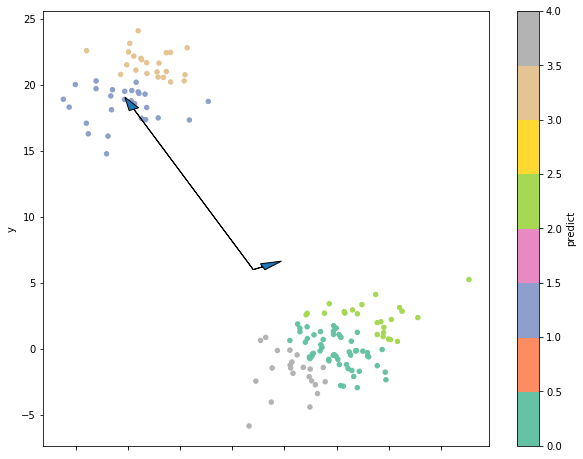

In [23]:
ax = X.plot.scatter(x='x', y='y', c='predict', cmap=plt.cm.Set2)
ax.arrow(6, 6, x_pca_axis[0], y_pca_axis[0], head_width=0.5, head_length=1) # PCA x
ax.arrow(6, 6, x_pca_axis[1], y_pca_axis[1], head_width=0.5, head_length=1); # PCA y

A tak wygląda obraz w nowym układzie współrzędnych.

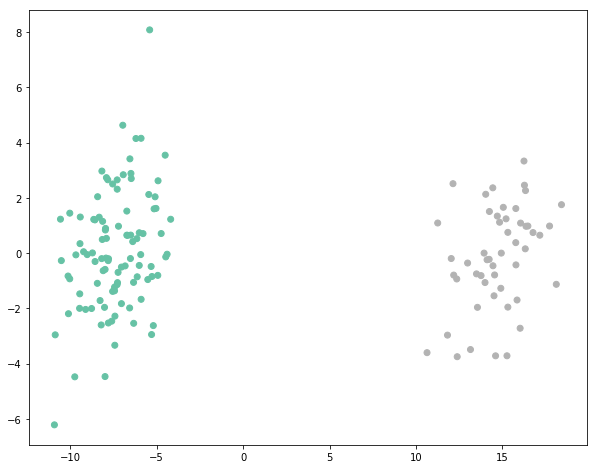

In [24]:
plt.scatter(p[:, 0], p[:, 1], c=X['label'], cmap=plt.cm.Set2);

### Zadanie

1. Wykonaj PCA dla danych irysów.
1. Poeksperymentuj z liczbą komponentów.
1. Ile wariancji tłumaczą poszczególne komponenty?